## Exercise 1

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

#### Q1

This dataset describes the medical records for Pima Indians
and whether or not each patient will have an onset of diabetes within ve years.

Fields description follow:

preg = Number of times pregnant

plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres = Diastolic blood pressure (mm Hg)

skin = Triceps skin fold thickness (mm)

test = 2-Hour serum insulin (mu U/ml)

mass = Body mass index (weight in kg/(height in m)^2)

pedi = Diabetes pedigree function

age = Age (years)

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

#### Q2

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.age.describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: age, dtype: float64

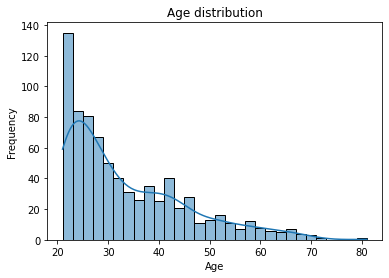

In [4]:
sb.histplot(df.age, bins =30, kde=True)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution")
plt.show()

mean age = 33.240885 std.dev = 11.760232

#### Q3

In [5]:
df[['class','mass','age']].corr()

,class,mass,age
class,1.000000,0.292695,0.238356
mass,0.292695,1.000000,0.036242
age,0.238356,0.036242,1.000000


therefore age and BMI have a slight positive correlation with class. class and age have a correlation of 0.238356 while class and BMI have a correlation of 0.292695

#### Q4

In [6]:
df.groupby('class').count()

,preg,plas,pres,skin,insu,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


therefore the dataset is unbalanxced with class = 0 (test negative for diabetese having almost double the number of instancse than class 1 : test positive for diabetese)

#### Q5

In [7]:
feature_cols = ['preg','plas','pres','skin','insu','mass','pedi','age']
X = df[feature_cols]
y = df['class']

In [8]:
#splitting the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=25)

In [9]:
#building a logistic regression
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression(max_iter = 1000)
logisticreg.fit(X_train,y_train)
y_pred=logisticreg.predict(X_test)
score = logisticreg.score(X_train,y_train)
print("Score: ",score)

Score:  0.7690875232774674


#### Q6

In [10]:
# import the metrics class
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[138,  22],
       [ 25,  46]], dtype=int64)

visualization using a confusion matrix

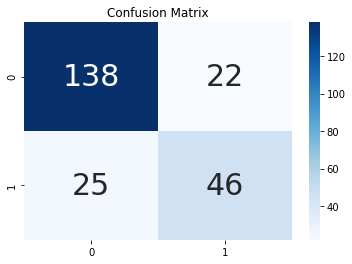

In [11]:
#displaying in the form of heatmap
ax = plt.axes()
df_cm = confusion_matrix
sb.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

#### Q7

In [12]:
TN = confusion_matrix[0,0]
TP = confusion_matrix[1,0]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,1]
TNR = TN / (TN+FP)

In [13]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Specificity:",TNR)

Accuracy: 0.7965367965367965
Precision: 0.6764705882352942
Recall: 0.647887323943662
Specificity: 0.8625


#### Q8

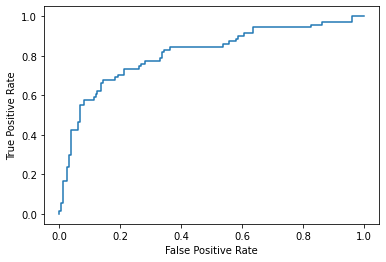

In [14]:
from sklearn.metrics import roc_curve
Y_pred_proba = logisticreg.predict_proba(X_test)[::, 1]
fpr, tpr, _ = roc_curve(y_test, Y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Exercise2

#### Q1

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

In [15]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
df.drop('Id',axis='columns', inplace=True )

In [17]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

therefore there is no missing value in the dataset

#### Q2

D:\Ananconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Ananconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Ananconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  wa

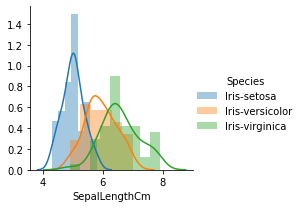

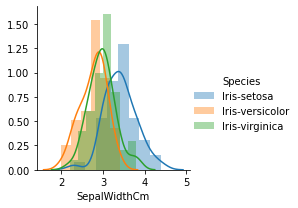

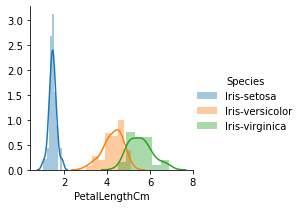

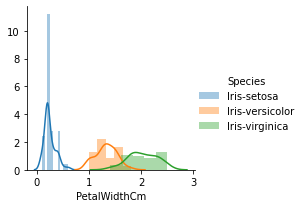

In [18]:
plot = sb.FacetGrid(df, hue="Species")
plot.map(sb.distplot, "SepalLengthCm").add_legend()
plot = sb.FacetGrid(df, hue="Species")
plot.map(sb.distplot, "SepalWidthCm").add_legend()
plot = sb.FacetGrid(df, hue="Species")
plot.map(sb.distplot, "PetalLengthCm").add_legend()  
plot = sb.FacetGrid(df, hue="Species")
plot.map(sb.distplot, "PetalWidthCm").add_legend()
plt.show()

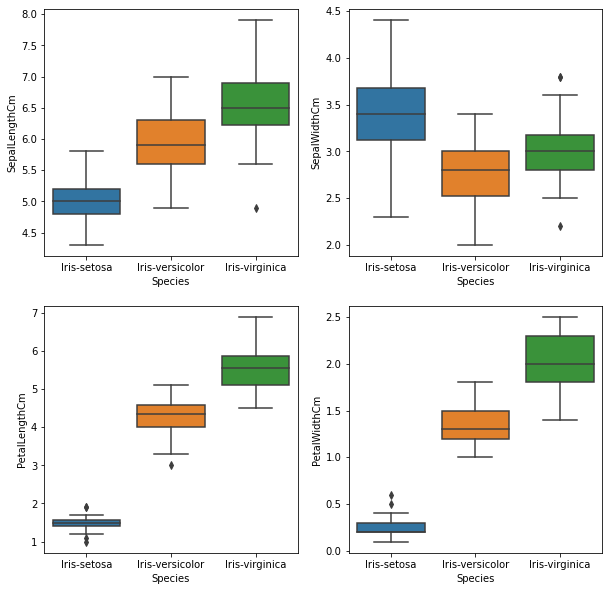

In [19]:
def graph(y):
    sb.boxplot(x="Species", y=y, data=df)
  
plt.figure(figsize=(10,10))
      
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('SepalLengthCm')
  
plt.subplot(222)
graph('SepalWidthCm')
  
plt.subplot(223)
graph('PetalLengthCm')
  
plt.subplot(224)
graph('PetalWidthCm')
  
plt.show()

#### Q3

In [20]:
feature_cols = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = df[feature_cols]
y = df['Species']

In [33]:
x = np.array(X)
y = np.array(y)

In [34]:
#splitting the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=25)

In [35]:
#building a logistic regression
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression()
logisticreg.fit(X_train,y_train)
y_pred=logisticreg.predict(X_test)


#### Q4

In [36]:
# import the metrics class
from sklearn import metrics #this could be avoided as the library has already been imported hence not important here
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[17,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 12]], dtype=int64)

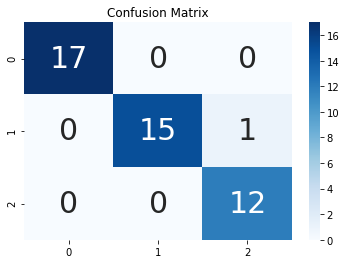

In [37]:
# display in the form og heatmap 
ax = plt.axes()
df_cm = confusion_matrix
sb.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [38]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("Precision:",metrics.precision_score(y_test, y_pred))
#print("Recall:",metrics.recall_score(y_test, y_pred))

#write code

Accuracy: 0.9777777777777777


#### Q5

In [39]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
y_pred = classifier.predict(X_test) #this is done  to make prediction to our test data

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
for n_neighbors in range (2,21):
    print(n_neighbors)
    classifier = KNeighborsClassifier(n_neighbors)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    
#this function calculated the accuracy measures along with the confusion matrix for all values between 2 and 20
#it calculates precision, recall, f1-score and support for all the k values

2
[[17  0  0]
 [ 0 15  1]
 [ 0  1 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45

3
[[17  0  0]
 [ 0 14  2]
 [ 0  0 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.88      0.93        16
 Iris-virginica       0.86      1.00      0.92        12

       accuracy                           0.96        45
      macro avg       0.95      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45

4
[[17  0  0]
 [ 0 15  1]
 [ 0  1 11]]
                 precision    recall  f1-score   support

    Iris-setosa      

#### Q6

In [47]:
k_select = []
for k in range(2,21):
    knc = KNeighborsClassifier(n_neighbors = k)
    knc.fit(X_train, y_train)
    y_pred = knc.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if score > 0.95:
        k_select.append(k)
    print("Score for k : {} = {}".format(k,score))

Score for k : 2 = 0.9555555555555556
Score for k : 3 = 0.9555555555555556
Score for k : 4 = 0.9555555555555556
Score for k : 5 = 0.9555555555555556
Score for k : 6 = 0.9111111111111111
Score for k : 7 = 0.9333333333333333
Score for k : 8 = 0.9555555555555556
Score for k : 9 = 0.9555555555555556
Score for k : 10 = 0.9555555555555556
Score for k : 11 = 0.9777777777777777
Score for k : 12 = 0.9777777777777777
Score for k : 13 = 1.0
Score for k : 14 = 1.0
Score for k : 15 = 1.0
Score for k : 16 = 1.0
Score for k : 17 = 0.9777777777777777
Score for k : 18 = 0.9777777777777777
Score for k : 19 = 1.0
Score for k : 20 = 1.0


In [48]:
print("Best Values of K : ", k_select)

N_samples = X.shape[0]

print("Square Root of N ({}) = {}".format(N_samples, N_samples**0.5))

Best Values of K :  [2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Square Root of N (150) = 12.24744871391589


on analyzing the dataset we find that the best k is 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20

#### Q7

according to the computation knn has a slightly better(very minor) accuracy than logistic regression.
with the highest accuracy of knn being 1 and accuracy of logistic regression being 0.977777